In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_parquet("../hpc-datasets/repo_infos.parquet")

In [3]:
df["no_commits"].describe()

count     94251.000000
mean        724.588683
std        3709.118039
min           1.000000
25%          47.000000
50%         134.000000
75%         417.000000
max      289893.000000
Name: no_commits, dtype: float64

In [4]:
commit_thresh = df["no_commits"].quantile(0.99)
commit_thresh

10209.5

In [5]:
df[df["no_commits"] > commit_thresh]

,first_commit,last_commit,no_contributors,no_commits,no_struc_changing_commits,max_file_depth
repo_id,,,,,,
util-linux_util-linux,6dbe3af945a63f025561abb83275cee9ff06c57b,6193777d7ba9e90a1999b1fecdd16f06a3e3cec1,990,15502,1297,12
apache_james-project,136509acf01b31816ab3837ed8ca9fef670da434,c887b22909638bbed49fbc740887668265bb3778,154,14185,3641,16
bforartists_bforartists,12315f4d0e0ae993805f141f64cb8c73c5297311,63328790a0d1e870c27035a6f087368aa457142d,1106,56066,2857,8
gromacs_gromacs,fe029f0701ede5d72696f5f01a4dded0d436d6c6,e1335f7e674056f8a963f9b2d364d14c8c86572c,244,15154,2583,13
sakaiproject_sakai,b2e232f1eb95149caf7be9fe1a135ad3e38d9a71,4b5c2e0e1298a2982d0a06649eb8f576e3e3b4be,359,12010,1475,15
...,...,...,...,...,...,...
flutter_engine,388568d2ce8f5894950c05d5f4dab124ceb8b7eb,c381b852605fded3f75e3ef050da9fc08852c6ae,738,35793,3535,12
xwiki_xwiki-platform,fd92841151ac9d81da39babdb82516dbb7e4add7,7659cafc7f39ef6ca37e6087173dcbe5d88ad9ca,300,24119,3808,16
bitnine-oss_agensgraph,d31084e9d1118b25fd16580d9d8c2924b5740dff,247f3275ceb24ecd27b4922e93b3bd7dfab52dd8,69,40189,2751,8


In [11]:
df.iloc[9036]

first_commit                 5b298e8f62c22ff0e8e7c2f370fc30d478a99592
last_commit                  8e7149fb0c1268daab4d95c861d5f4ee5fda15ba
no_contributors                                                     4
no_commits                                                         19
no_struc_changing_commits                                           7
max_file_depth                                                      6
no_cores                                                            1
Name: arrow-kt_arrow-exact, dtype: object

In [8]:
max_cores = 16
min_cores = 1

num_cores = df["no_commits"]/commit_thresh*(max_cores-min_cores)+min_cores
num_cores = np.minimum(16, np.maximum(1, num_cores))
num_cores = np.round(num_cores).astype(int)
df["no_cores"] = num_cores
num_cores

repo_id
smooth-code_smooth-ui                                        1
thedodd_wither                                               1
strivexjun_aheadlib-x86-x64                                  1
wanderson-magalhaes_modern_gui_pydracula_pyside6_or_pyqt6    1
8go_matrix-commander-rs                                      1
                                                            ..
swaggymacro_yanglegeyang                                     1
ardamavi_vocalization-sign-language-ios                      1
fracz_git-exercises                                          1
jschr_textillate                                             1
almaleh_dispatcher                                           1
Name: no_commits, Length: 94251, dtype: int64

In [21]:
df.loc["i-tu_hasklig"]

first_commit                 2e9914fd78b6fc7283597a2675e2495f5bf0b745
last_commit                  5344dc892cf93d5dedd7be1efd72a62adda90436
no_contributors                                                    55
no_commits                                                        109
no_struc_changing_commits                                          30
max_file_depth                                                      5
no_cores                                                            1
Name: i-tu_hasklig, dtype: object

In [22]:
df.loc["torvalds_linux"]

first_commit                 1da177e4c3f41524e886b7f1b8a0c1fc7321cac2
last_commit                  c381c89de18015fab265d18d2fa2f30b395be216
no_contributors                                                 33756
no_commits                                                      69748
no_struc_changing_commits                                       10864
max_file_depth                                                     13
no_cores                                                           16
Name: torvalds_linux, dtype: object

In [9]:
num_cores.describe()

count    94251.000000
mean         1.759801
std          2.107748
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: no_commits, dtype: float64

In [12]:
unique, counts = np.unique(num_cores, return_counts=True)
unique, counts

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([67070, 15757,  4369,  2085,  1154,   731,   541,   391,   315,
          232,   162,   151,   137,    94,    77,   985]))

In [10]:
df["no_cores"].to_csv("../datasets/repo_cores.csv")

In [9]:
df_github = pd.read_csv("../datasets/github_data_07_03_2024.csv", keep_default_na=False)
df_github["repo_id"] = (
    df_github["owner.name"].str.lower() + "_" + df_github["name"].str.lower()
)

df_github = df_github[~df_github["ignored"]]

In [10]:
df_github

,name,url,clone_url,default_branch,stargazers_count,owner.name,owner.type,description,language,topics,size,archived,created_at,pushed_at,ignored,lang,repo_id
5,youtube-dl,https://github.com/ytdl-org/youtube-dl,https://github.com/ytdl-org/youtube-dl.git,master,127505,ytdl-org,Organization,Command-line program to download videos from Y...,Python,NaN,64801,False,2010-10-31 14:35:07+00:00,2024-03-07 15:23:16+00:00,False,Python,ytdl-org_youtube-dl
6,stable-diffusion-webui,https://github.com/AUTOMATIC1111/stable-diffus...,https://github.com/AUTOMATIC1111/stable-diffus...,master,124538,AUTOMATIC1111,User,Stable Diffusion web UI,Python,ai|ai-art|deep-learning|diffusion|gradio|image...,34897,False,2022-08-22 14:05:26+00:00,2024-03-07 08:29:46+00:00,False,Python,automatic1111_stable-diffusion-webui
7,transformers,https://github.com/huggingface/transformers,https://github.com/huggingface/transformers.git,main,121602,huggingface,Organization,🤗 Transformers: State-of-the-art Machine Learn...,Python,bert|deep-learning|flax|hacktoberfest|jax|lang...,214266,False,2018-10-29 13:56:00+00:00,2024-03-07 20:09:58+00:00,False,Python,huggingface_transformers
8,HelloGitHub,https://github.com/521xueweihan/HelloGitHub,https://github.com/521xueweihan/HelloGitHub.git,master,82913,521xueweihan,User,:octocat: 分享 GitHub 上有趣、入门级的开源项目。Share interes...,Python,awesome|github|hellogithub|python,5497,False,2016-05-04 06:24:11+00:00,2024-03-01 09:52:31+00:00,False,Python,521xueweihan_hellogithub
9,thefuck,https://github.com/nvbn/thefuck,https://github.com/nvbn/thefuck.git,master,82158,nvbn,User,Magnificent app which corrects your previous c...,Python,python|shell,4043,False,2015-04-08 15:08:04+00:00,2024-02-28 12:15:14+00:00,False,Python,nvbn_thefuck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CrashlyticsRecorder,https://github.com/AnthonyMDev/CrashlyticsReco...,https://github.com/AnthonyMDev/CrashlyticsReco...,master,27,AnthonyMDev,User,A wrapper for the Crashlytics framework allowi...,Swift,NaN,23999,False,2016-02-18 20:23:35+00:00,2020-10-09 22:51:54+00:00,False,Swift,anthonymdev_crashlyticsrecorder
99996,Badonde,https://github.com/davdroman/Badonde,https://github.com/davdroman/Badonde.git,master,27,davdroman,User,"Automated PR creation, tailored to your project",Swift,automation|git|github|jira|pr|pull-request|swi...,985,True,2018-09-28 10:21:18+00:00,2020-08-24 10:57:50+00:00,False,Swift,davdroman_badonde
99997,FloatWeChatView,https://github.com/zhouXiaoR/FloatWeChatView,https://github.com/zhouXiaoR/FloatWeChatView.git,master,27,zhouXiaoR,User,仿微信网页悬浮框,Swift,NaN,201,False,2018-06-19 09:00:44+00:00,2021-11-27 16:50:42+00:00,False,Swift,zhouxiaor_floatwechatview
99998,AKWaveform,https://github.com/piyushghoghari08/AKWaveform,https://github.com/piyushghoghari08/AKWaveform...,master,27,piyushghoghari08,User,NaN,Swift,NaN,99,False,2019-02-04 14:54:43+00:00,2020-01-26 06:23:13+00:00,False,Swift,piyushghoghari08_akwaveform


In [11]:
combined_df = df_github.join(df, on="repo_id", how="outer")
combined_df

/Users/matthijs/Library/Caches/pypoetry/virtualenvs/pydrillertests-Dtr3xvTk-py3.10/lib/python3.10/site-packages/IPython/lib/pretty.py:779: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/matthijs/Library/Caches/pypoetry/virtualenvs/pydrillertests-Dtr3xvTk-py3.10/lib/python3.10/site-packages/IPython/core/formatters.py:347: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,name,url,clone_url,default_branch,stargazers_count,owner.name,owner.type,description,language,topics,...,ignored,lang,repo_id,first_commit,last_commit,no_contributors,no_commits,no_struc_changing_commits,max_file_depth,no_cores
5.0,youtube-dl,https://github.com/ytdl-org/youtube-dl,https://github.com/ytdl-org/youtube-dl.git,master,127505.0,ytdl-org,Organization,Command-line program to download videos from Y...,Python,NaN,...,False,Python,ytdl-org_youtube-dl,4fa74b5252a23c2890ddee52b8ee5811b5bb2987,40bd5c18153afe765caa6726302ee1dd8a9a2ce6,1008.0,15694.0,1271.0,3.0,16.0
6.0,stable-diffusion-webui,https://github.com/AUTOMATIC1111/stable-diffus...,https://github.com/AUTOMATIC1111/stable-diffus...,master,124538.0,AUTOMATIC1111,User,Stable Diffusion web UI,Python,ai|ai-art|deep-learning|diffusion|gradio|image...,...,False,Python,automatic1111_stable-diffusion-webui,71cf18b012857b2cbbc52ff66f63db83689b6bfc,cf2772fab0af5573da775e7437e6acdca424f26e,575.0,2129.0,215.0,4.0,14.0
7.0,transformers,https://github.com/huggingface/transformers,https://github.com/huggingface/transformers.git,main,121602.0,huggingface,Organization,🤗 Transformers: State-of-the-art Machine Learn...,Python,bert|deep-learning|flax|hacktoberfest|jax|lang...,...,False,Python,huggingface_transformers,43badf217d1ccfaf486e2cbb1b3567226b5e95bf,831bc25d8fdb85768402f772cf65cc3d7872b211,2435.0,13177.0,1861.0,6.0,16.0
8.0,HelloGitHub,https://github.com/521xueweihan/HelloGitHub,https://github.com/521xueweihan/HelloGitHub.git,master,82913.0,521xueweihan,User,:octocat: 分享 GitHub 上有趣、入门级的开源项目。Share interes...,Python,awesome|github|hellogithub|python,...,False,Python,521xueweihan_hellogithub,9bfe38ad37b517777b9d56a8d89034f594f080f3,5ccd385666c14e1673787e4be2d5fda9c58fe7f2,11.0,170.0,70.0,2.0,2.0
9.0,thefuck,https://github.com/nvbn/thefuck,https://github.com/nvbn/thefuck.git,master,82158.0,nvbn,User,Magnificent app which corrects your previous c...,Python,python|shell,...,False,Python,nvbn_thefuck,71f1f4224b267711bd9cc372a2ec69902f423a01,c7e7e1d884d3bb241ea6448f72a989434c2a35ec,200.0,937.0,229.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,rabanti-github_nanoxlsx,3e2515a2cfac69ccb47c67775f889629c1c88247,ecb03ac05a9899e74907929e2ef90ee7623eabfc,11.0,219.0,88.0,5.0,2.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,aditya-vora_fchd-fully-convolutional-head-dete...,64bd14c7a38cfc033d365cbd9e564a534e23410c,0d05fe30c2dcc9ab1262d5bcefded7d9966b50e1,2.0,17.0,6.0,4.0,1.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,lejon_t-sne-java,edb062dd2aca5e418012ff4aa0cf321ce994bbbe,5e334b01c0c779b3e90a40dfddea12f2b704e910,7.0,231.0,41.0,8.0,2.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,los-cocos_cocos,d9a24d8906c4edd5f090d5e62c8e9ddd6a9be9bd,24ec855c2817a1ecf1f2151130ea920108319f4d,30.0,1145.0,288.0,5.0,8.0


In [12]:
from sklearn.linear_model import LinearRegression
from scipy import stats

X = combined_df["size"].fillna(0).values.reshape(-1, 1)
Y = combined_df["no_cores"].fillna(0).values.reshape(-1, 1)

regression_model = LinearRegression()
regression_model.fit(X, Y)

intercept = regression_model.intercept_[0]
slope = regression_model.coef_[0][0]

print("Intercept:", intercept)
print("Slope:", slope)

Intercept: 3.222249376312312
Slope: 2.844395125505848e-06


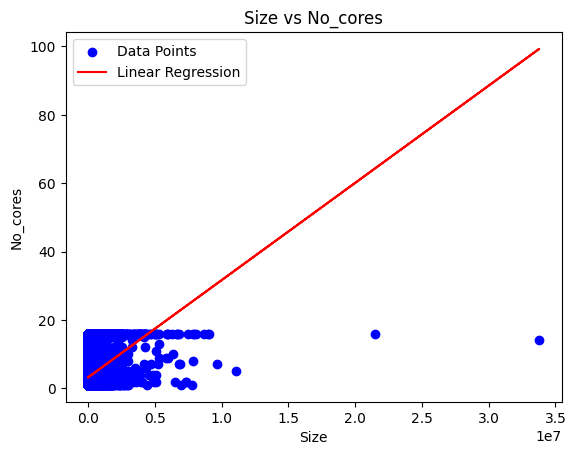

In [13]:
import matplotlib.pyplot as plt

# Plotting the size and no_cores
plt.scatter(combined_df["size"], combined_df["no_cores"], color='blue', label='Data Points')

# Plotting the linear regression line
plt.plot(combined_df["size"], regression_model.predict(X), color='red', label='Linear Regression')

# Adding labels and title
plt.xlabel('Size')
plt.ylabel('No_cores')
plt.title('Size vs No_cores')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()
